In [2]:
#Author: Emma Wiechert
#Program: Lab6_Group1_eWiechert
#Purpose: Compare different fast food locations and organize them by "healthiness"

#program set up

#imports
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#read the data from the csv
og_ffood = pd.read_csv('fastfood.csv')

#### Step 1 Descriptive Analysis of dataset

In [3]:
#print out the dataset
og_ffood.describe(include = 'all')

restaurant                     item     calories      cal_fat  \
count         515                      515   515.000000   515.000000   
unique          8                      505          NaN          NaN   
top     Taco Bell  Crispy Chicken Sandwich          NaN          NaN   
freq          115                        3          NaN          NaN   
mean          NaN                      NaN   530.912621   238.813592   
std           NaN                      NaN   282.436147   166.407510   
min           NaN                      NaN    20.000000     0.000000   
25%           NaN                      NaN   330.000000   120.000000   
50%           NaN                      NaN   490.000000   210.000000   
75%           NaN                      NaN   690.000000   310.000000   
max           NaN                      NaN  2430.000000  1270.000000   

         total_fat     sat_fat   trans_fat  cholesterol       sodium  \
count   515.000000  515.000000  515.000000   515.000000   515.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean     26.590291    8.153398    0.465049    72.456311  1246.737864   
std      18.411876    6.418811    0.839644    63.160406   689.954278   
min       0.000000    0.000000    0.000000     0.000000    15.000000   
25%      14.000000    4.000000    0.000000    35.000000   800.000000   
50%      23.000000    7.000000    0.000000    60.000000  1110.000000   
75%      35.000000   11.000000    1.000000    95.000000  1550.000000   
max     141.000000   47.000000    8.000000   805.000000  6080.000000   

        total_carb       fiber       sugar     protein       vit_a  \
count   515.000000  503.000000  515.000000  514.000000  301.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     45.664078    4.137177    7.262136   27.891051   18.857143   
std      24.883342    3.037460    6.761301   17.683921   31.384330   
min       0.000000    0.000000    0.000000    1.000000    0.000000   
25%      28.500000    2.000000    3.000000   16.000000    4.000000   
50%      44.000000    3.000000    6.000000   24.500000   10.000000   
75%      57.000000    5.000000    9.000000   36.000000   20.000000   
max     156.000000   17.000000   87.000000  186.000000  180.000000   

             vit_c     calcium  salad  
count   305.000000  305.000000    515  
unique         NaN         NaN      1  
top            NaN         NaN  Other  
freq           NaN         NaN    515  
mean     20.170492   24.852459    NaN  
std      30.592243   25.522073    NaN  
min       0.000000    0.000000    NaN  
25%       4.000000    8.000000    NaN  
50%      10.000000   20.000000    NaN  
75%      30.000000   30.000000    NaN  
max     400.000000  290.000000    NaN

In [4]:
#check for missing variables
og_ffood.isna().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

C:\Users\emmaw\AppData\Local\Temp\ipykernel_12472\4286786327.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = og_ffood.corr().round(2)


<Axes: >

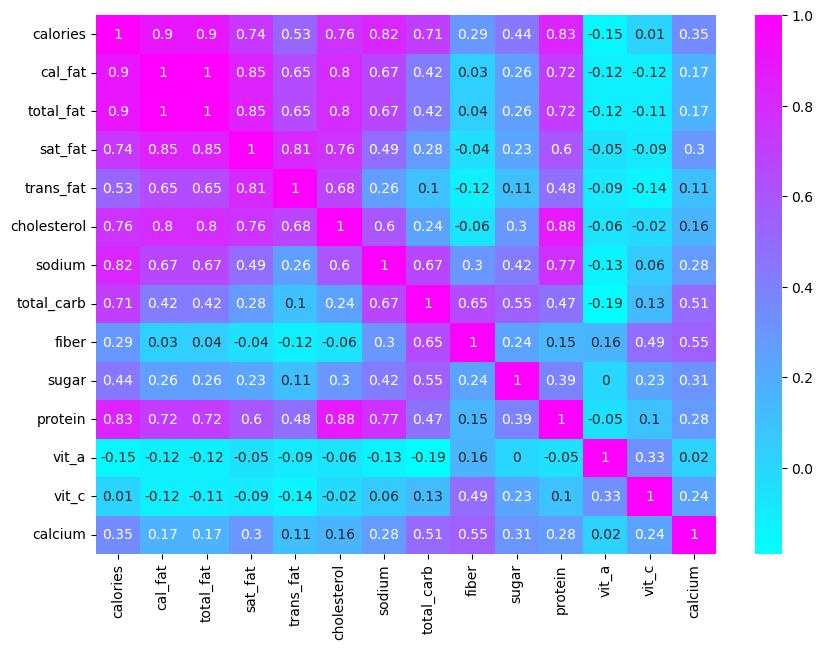

In [5]:
#find correlation matrix
corr_mat = og_ffood.corr().round(2)

#create heat map of the correlation matrix
plt.figure(figsize = (10,7))
sns.heatmap(corr_mat, annot = True, cmap = 'cool')

#### Step 2 Extract important features from dataset using PCA method

In [16]:
###clean up and prepare the data

#fill in missing values
og_ffood['fiber'].replace(np.nan, og_ffood['fiber'].median())
og_ffood['protein'].replace(np.nan, og_ffood['protein'].median())
og_ffood.dropna(inplace=True)

#copy df to maintain one with restaurant and item strings and one without
ffood = og_ffood.copy()

###use integer encoding to categorize the different restaurants

#encode restaurants and items to be numerical
encoder = LabelEncoder()
ffood['restaurant'] = encoder.fit_transform(ffood['restaurant'])
ffood['item'] = ffood['item'].index

#drop columns with many missing entries
og_ffoodwr = ffood.drop(['vit_a', 'vit_c', 'calcium', 'salad'], axis = 1)

#drop columns unnecessary for determining healthiness
ffood = og_ffoodwr.drop(['restaurant', 'item'], axis = 1)#DEBUG: restaurant doesn't exist?


KeyError: "['vit_a', 'vit_c', 'calcium'] not found in axis"

In [17]:
#normalize the data
scaler = MinMaxScaler()
ffood = scaler.fit_transform(ffood)

ffood = pd.DataFrame(ffood, columns = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein'])

#check the data
ffood

calories   cal_fat  total_fat   sat_fat  trans_fat  cholesterol  \
0    0.149378  0.047244   0.049645  0.042553     0.0000     0.118012   
1    0.340249  0.322835   0.319149  0.361702     0.1875     0.161491   
2    0.460581  0.472441   0.475177  0.574468     0.3750     0.273292   
3    0.302905  0.220472   0.219858  0.212766     0.0625     0.192547   
4    0.373444  0.322835   0.319149  0.255319     0.0625     0.149068   
..        ...       ...        ...       ...        ...          ...   
498  0.315353  0.267717   0.269504  0.212766     0.0625     0.062112   
499  0.232365  0.204724   0.205674  0.191489     0.1250     0.074534   
500  0.315353  0.299213   0.297872  0.212766     0.1250     0.074534   
501  0.290456  0.251969   0.248227  0.148936     0.0000     0.086957   
502  0.290456  0.251969   0.255319  0.170213     0.1250     0.068323   

       sodium  total_carb     fiber     sugar   protein  
0    0.180544    0.282051  0.176471  0.126437  0.194595  
1    0.258038    0.397436  0.117647  0.206897  0.243243  
2    0.314097    0.403846  0.176471  0.206897  0.372973  
3    0.317395    0.397436  0.117647  0.206897  0.291892  
4    0.323990    0.519231  0.235294  0.206897  0.243243  
..        ...         ...       ...       ...       ...  
498  0.302556    0.557692  0.529412  0.091954  0.118919  
499  0.206925    0.378205  0.470588  0.080460  0.118919  
500  0.218467    0.474359  0.647059  0.080460  0.135135  
501  0.205276    0.448718  0.470588  0.091954  0.167568  
502  0.218467    0.448718  0.470588  0.091954  0.145946  

[503 rows x 11 columns]

In [10]:
#use the data
#then visualize results in a heat map
#seperate PCA to grab the first 2 output components
pca2 = PCA(n_components = 2)
pca2.fit(ffood)

#seperate PCA to grab the first 2 output components
pca5 = PCA(n_components = 5)
pca5.fit(ffood)

# X2d is the first 2 principle components
x2d = pca2.transform(ffood)

# X5d is the first 5 principle components
x5d = pca5.transform(ffood)

Text(0, 0.5, 'Principle Component')

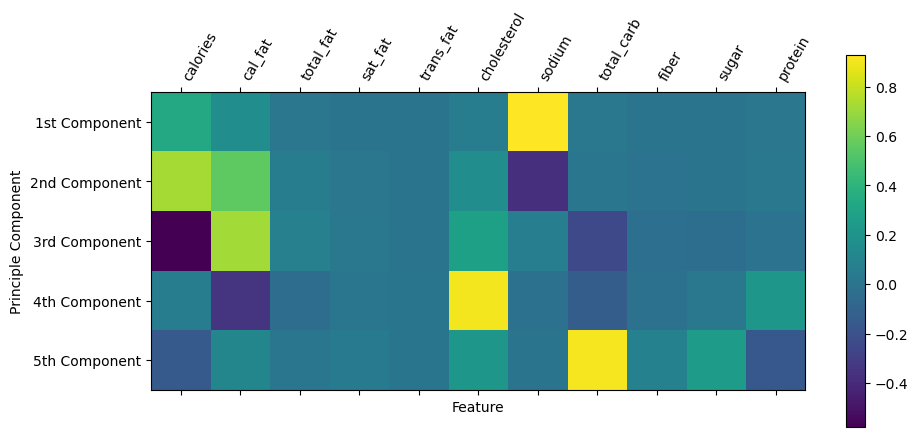

In [11]:
#create and display a correlation matrix
plt.matshow(pca5.components_)
plt.yticks([0,1, 2, 3, 4], ['1st Component', '2nd Component', '3rd Component', '4th Component', '5th Component'])
plt.colorbar()
plt.xticks(range(0,11), ffood.columns, rotation = 60, ha = 'left')
plt.xlabel('Feature')
plt.ylabel('Principle Component')

In [15]:
#visualize PCA data output with a scatterplot
fig = plt.figure()
colors = ['red','yellow','blue','orange','green','purple','brown']
plt.scatter(x2d[:,0],x2d[:,1],c=og_ffood['restaurant'],cmap=matplotlib.colors.ListedColormap(colors))
plt.axis('equal')
plt.show()

KeyError: 'restaurant'

<Figure size 640x480 with 0 Axes>

#### Step 3 Cluster analysis using k-clustering method

In [ ]:
#BONUS